In [1]:
import cv2

frozen_model = r'C:\Users\priya\OneDrive\Desktop\obj detection\frozen_inference_graph.pb'
config_file = r'C:\Users\priya\OneDrive\Desktop\obj detection\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255 / 2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001DDDB22F6D0>

In [2]:
classlabels = []
file_name = r'C:\Users\priya\OneDrive\Desktop\obj detection\labels.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

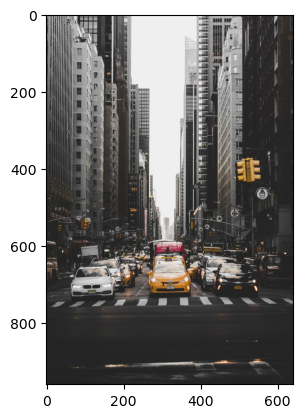

In [3]:
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\priya\OneDrive\Desktop\obj detection\john-arano-LzxsSWAVMYs-unsplash.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
 print(len(classlabels))

80


In [6]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [7]:
print(ClassIndex)

[ 3  3  3 10  3  3  3  3  3  3  3  3  3 10  1 10  3 10 10]


In [8]:
print(bbox) # x, y, w, h

[[186 649  48  68]
 [371 622  53  66]
 [223 622  33  42]
 [ 97 528  13  30]
 [395 620  69  80]
 [155 647  52  75]
 [ 65 649 117  89]
 [193 624  39  49]
 [560 625  42  53]
 [510 623  37  48]
 [262 617 120 121]
 [ 38 542 566 154]
 [398 638  59  81]
 [551 592  12  31]
 [548 617  27  59]
 [ 93 536  11  27]
 [431 647  84  77]
 [377 534   9  26]
 [495 374  52  67]]


In [9]:
print(ClassIndex)

[ 3  3  3 10  3  3  3  3  3  3  3  3  3 10  1 10  3 10 10]


In [10]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

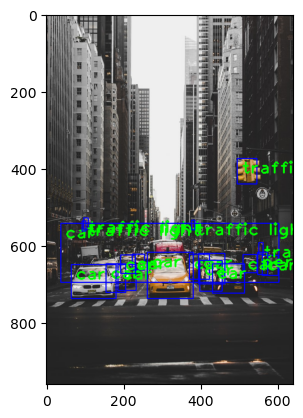

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

